In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
# packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
# Importing the dataset
from sklearn.datasets import load_boston

In [5]:
# Loading the housing dataset
boston = load_boston()

In [6]:
# printing info about the dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Count of houses')

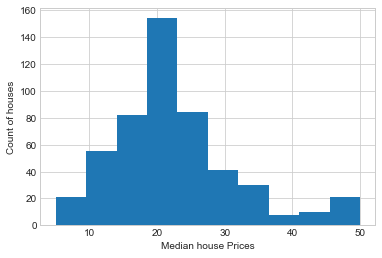

In [7]:
# Running basic visualizations
plt.hist(boston.target)
plt.xlabel('Median house Prices')
plt.ylabel('Count of houses')

Lets plot for median price Vs the number of rooms in a house:

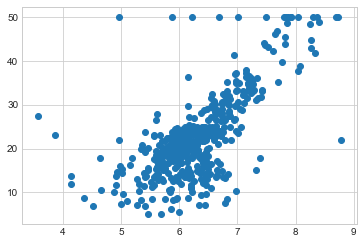

In [8]:
plt.scatter(boston.data[:,5], boston.target)

Here, we can observe that with increase in number of rooms in a house, the Median price also increases.

In [9]:
# Converting boston data to a dataframe
boston_df = DataFrame(boston.data)

In [10]:
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
# Creating the target variable Price
boston_df['Price'] = boston.target


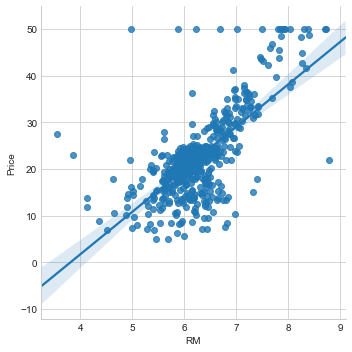

In [12]:
# Using the seaborn lmplot function to visualise RM and price
sns.lmplot('RM', 'Price', data=boston_df)

# Using Scikit Learn to implement a Multivariate regression

In [13]:
# Importing packages for Linear regression
import sklearn
from sklearn.linear_model import LinearRegression

In [14]:
lreg = LinearRegression()

The functions we will be using are:

lreg.fit() which fits a linear model

lreg.predict() which is used to predict Y using the linear model with estimated coefficients

lreg.score() which returns the coefficient of determination (R^2). 

In [15]:
# Seperating the independent variables (X's) from the target variable (Y) for the regression analysis:
x = boston_df.drop('Price', 1)
y = boston_df.Price 

Fitting the Model:

In [16]:
lreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Lets do a correlation analysis between the variables with target variable

In [17]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


Training and Validation Set:

In [18]:
import sklearn.cross_validation
sklearn.model_selection.train_test_split
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(x, boston_df.Price)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
# Lets check the output for train,test split
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(379, 13) (127, 13) (379,) (127,)


Now, we have the train and test set and so we can move to predict the Price:

# Predicting Prices:

In [20]:
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# predicting on both train and test set
pred_train = lreg.predict(X_train)
pred_test  = lreg.predict(X_test)

Computing the MSE:

In [22]:
print("MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
print("MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

MSE with Y_train: 21.05
MSE with X_test and Y_test: 26.24


Thus, we observe that MSE between train and test set is pretty close

Further, we visualize Actual Vs Predicted:

# Residual Plots

Plotting difference between Observed and Predicted Values:

If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate. 
It shows the residuals on the vertical axis and the independent variable on the horizontal axis.


For a good Model, data should be randomly scattered around line zero. If there is some structure or pattern in the plot then the model is not capturing all the relations.


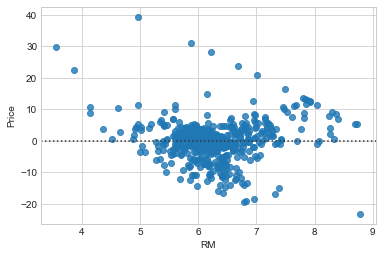

In [24]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Price', data = boston_df)

Thus, we observe that the majority of the residuals are randomly scattered and no proper pattern is visible.

'C:\\Users\\sumit'